# Breast prediction Using Naive Bayes Classifier

# Approach
1: Separate By Class.

2: Summarize Dataset.

3: Find Prior probabilities

4: Calculate Likelihood

5: Calculate 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns #For getting the heatmap

In [42]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Analysis and Pre-Processing

In [43]:
df.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,0


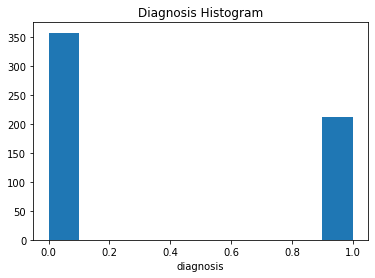

In [44]:
df = df.drop(df[['Unnamed: 32', 'id']],axis =1) #dropping the unnamed bad column
df[['diagnosis']] = df[['diagnosis']].replace(['M'], 1).replace(['B'], 0) #replacing Malignant with 1s and Benign with 0s
plt.hist(df['diagnosis'])
plt.xlabel('diagnosis')
plt.title('Diagnosis Histogram')
plt.show()

**Standardization** is the process of scaling data so that they have a mean value of 0 and a standard deviation of 1. It's more useful and common for classification tasks.

                                    x′= (x − μ) / σ


In [45]:
df.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [46]:
def scaleDataframe(df) :
    stat_data = df.describe()
    for column in df:
        df[column] = (df[column] - stat_data[column]['mean']) / stat_data[column]['std'] 
    return df

<AxesSubplot:>

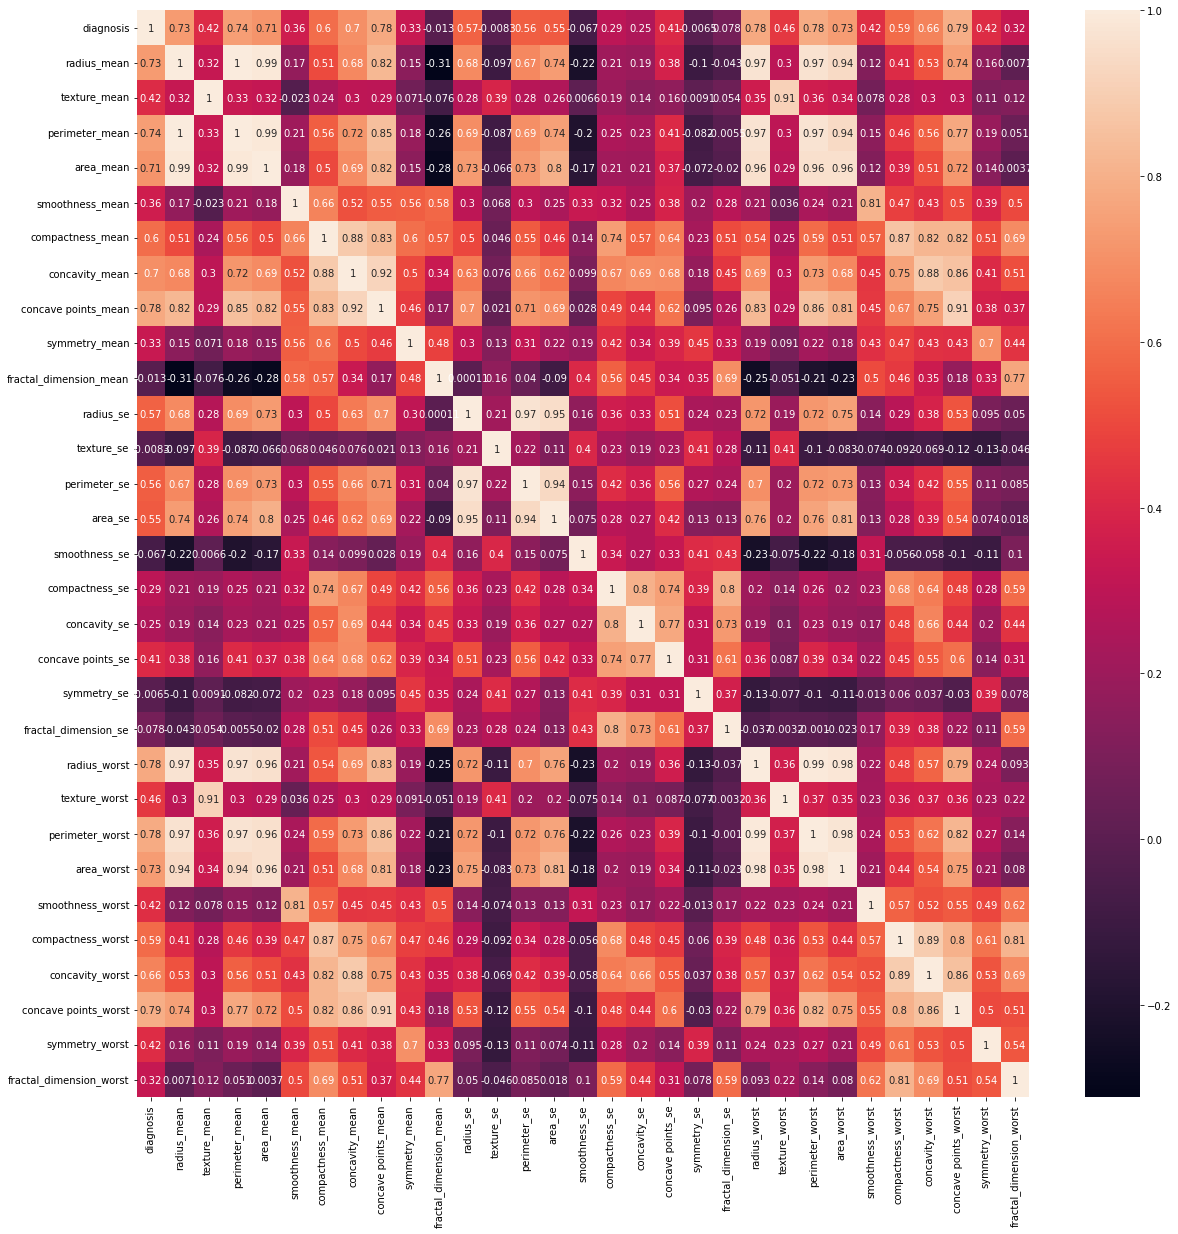

In [47]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot= True)

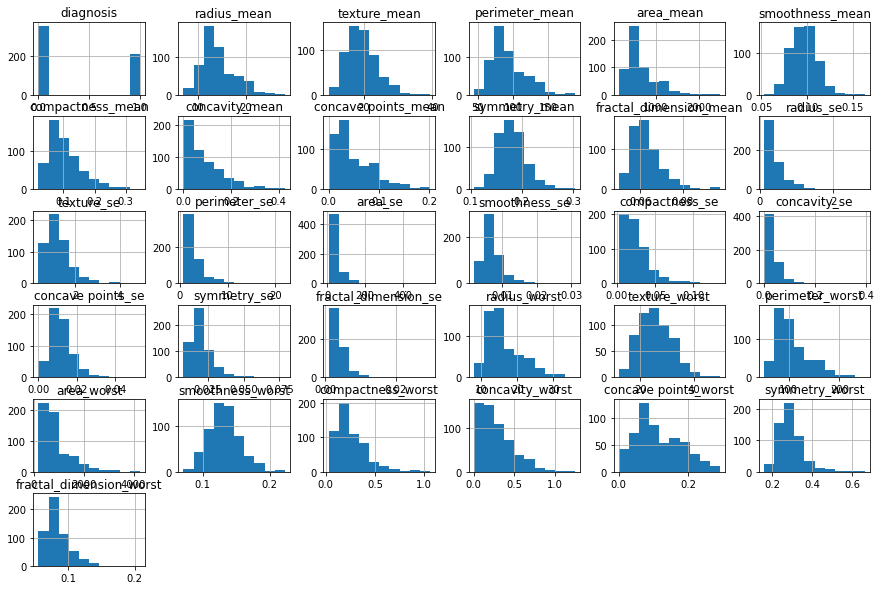

In [48]:
df.hist(figsize=(15,10))
plt.show()

# Selecting Input Features
**Radius Mean**, **compactness_mean**, **concavity_mean** are selected as the input features as they seem to be strongly co-related with Diagnosis and they also follow gaussian distribution

In [49]:
data = df[['radius_mean', "compactness_mean", "concavity_mean", "diagnosis"]]
data.head()

,radius_mean,compactness_mean,concavity_mean,diagnosis
0,17.99,0.27760,0.3001,1
1,20.57,0.07864,0.0869,1
2,19.69,0.15990,0.1974,1
3,11.42,0.28390,0.2414,1
4,20.29,0.13280,0.1980,1


<AxesSubplot:xlabel='concavity_mean', ylabel='Count'>

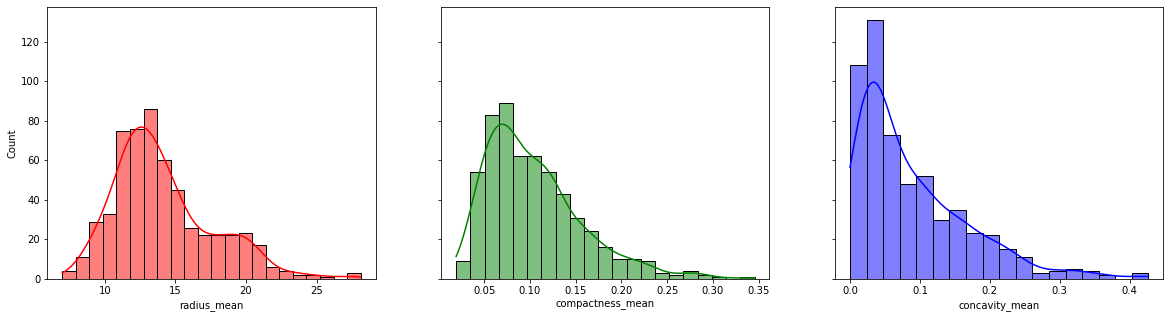

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.histplot(data, ax=axes[0], x="radius_mean", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="compactness_mean", kde=True, color='g')
sns.histplot(data, ax=axes[2], x="concavity_mean", kde=True, color = 'b')

# Splitting the Data 

In [51]:
train= data.sample(frac = 0.8, random_state=100)
test = data.drop(train.index)

# Calculating Prior probabilities

In [52]:
def calculate_prior(df, Y):
    classes = list(df[Y].unique())
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

# Calculating Likelihood

In [53]:
def calculate_likelihood(df, feat_name, feat_val, Y, clas):
    feat = list(df.columns)
    df = df[df[Y]==clas]
    mean = df[feat_name].mean()
    std = df[feat_name].std()
    p_x_given_y = 1 / (np.sqrt(2 * np.pi) * std) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

 # Calculating  posterior probabilities 

In [54]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1] # removing diagnosis

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # likelihood
        classes = sorted(list(df[Y].unique()))
        likelihood = [1]*len(classes)
        for j in range(len(classes)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood(df, features[i], x[i], Y, classes[j])

        # numerator
        post_prob = [1]*len(classes)
        for j in range(len(classes)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return Y_pred

## Test Gaussian model

In [55]:
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")



# Result Metrics and Visualisations

In [56]:
from sklearn.metrics import confusion_matrix, f1_score
print("Confusion Matrix : \n",confusion_matrix(Y_test, Y_pred))
print("F1 Score : ",f1_score(Y_test, Y_pred))

Confusion Matrix : 
 [[66  2]
 [ 3 43]]
F1 Score :  0.945054945054945


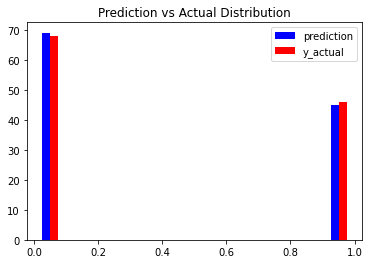

In [57]:
y_and_ypred = [Y_pred, Y_test]
a = plt.subplot()
labels = ['prediction', 'y_actual']
colors = ['blue','red']
a.hist(y_and_ypred, bins = 10, rwidth=0.5,label=labels, color = colors)
a.legend(prop={'size': 10})
plt.title(label="Prediction vs Actual Distribution")
plt.show()